<a href="https://colab.research.google.com/github/SujitbMusale/Supervised-ML-Regression--Seoul-Bike-Sharing-Demand-Prediction/blob/main/Copy_of_Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

#Read Required Libararies for project.





In [ ]:
# importing required libararies
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# read CSV file from drive
Bike_data= pd.read_csv('/content/drive/MyDrive/almabetter/capston project/Supervised Machine Learning - Regression/SeoulBikeData.csv',encoding = 'ISO-8859-1')

# Data cleaning

In [ ]:
Bike_data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
# check the statistic of data
Bike_data.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [ ]:
# check the columns in data
Bike_data.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
# To check null values in Rows.
Bike_data.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [ ]:
# to check the info for type of variable present inside data
Bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [ ]:
# Checking the descriptive statistics of the dataset
Bike_data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Date,8760,365,01/12/2017,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rented Bike Count,8760.0,NaN,NaN,NaN,704.602055,644.997468,0.0,191.0,504.5,1065.25,3556.0
Hour,8760.0,NaN,NaN,NaN,11.5,6.922582,0.0,5.75,11.5,17.25,23.0
Temperature(°C),8760.0,NaN,NaN,NaN,12.882922,11.944825,-17.8,3.5,13.7,22.5,39.4
Humidity(%),8760.0,NaN,NaN,NaN,58.226256,20.362413,0.0,42.0,57.0,74.0,98.0
Wind speed (m/s),8760.0,NaN,NaN,NaN,1.724909,1.0363,0.0,0.9,1.5,2.3,7.4
Visibility (10m),8760.0,NaN,NaN,NaN,1436.825799,608.298712,27.0,940.0,1698.0,2000.0,2000.0
Dew point temperature(°C),8760.0,NaN,NaN,NaN,4.073813,13.060369,-30.6,-4.7,5.1,14.8,27.2
Solar Radiation (MJ/m2),8760.0,NaN,NaN,NaN,0.569111,0.868746,0.0,0.0,0.01,0.93,3.52
Rainfall(mm),8760.0,NaN,NaN,NaN,0.148687,1.128193,0.0,0.0,0.0,0.0,35.0


In [ ]:
# To check for duplicate present in data set
len(Bike_data[Bike_data.duplicated()])

0

In [ ]:
# to check the distribution of Dependent variable 
print(f' The shape of dataset is {(Bike_data.shape)} \n Total Rows are : {(Bike_data.shape)[0]}\n Total Columns are : {(Bike_data.shape)[1]}')

 The shape of dataset is (8760, 14) 
 Total Rows are : 8760
 Total Columns are : 14


Some columns name are not in prpoer format which are required for variable so, convert them in to proper format.

In [ ]:
# rename the column name
Bike_data.rename(columns={'Date':'date','Rented Bike Count': 'rented_bike_count', 'Hour':'hour',
                    'Temperature(°C)':'temp', 'Humidity(%)':'humidity',
                    'Wind speed (m/s)': 'wind_speed', 'Visibility (10m)': 'visibility',
                    'Dew point temperature(°C)':'dew_point_temp',
                    'Solar Radiation (MJ/m2)': 'solar_radiation', 'Rainfall(mm)': 'rainfall',
                    'Snowfall (cm)':'snowfall', 'Seasons':'seasons',
                    'Holiday':'holiday', 'Functioning Day':'func_day'},inplace=True)

In [ ]:
# lets check the date format present in the given data
type(Bike_data['date'][0])

str

In [ ]:
# lets convert the date format from str to date time format.
Bike_data['date'] = Bike_data['date'].apply(lambda x: dt.datetime.strptime(x,'%d/%m/%Y'))

In [ ]:
# create the year,month and weekday column
Bike_data['year'] = Bike_data['date'].dt.year
Bike_data['month'] = Bike_data['date'].dt.month
Bike_data['weekday'] = Bike_data['date'].dt.weekday

In [ ]:
#Drop Date column 
Bike_data = Bike_data.drop(columns = ['date'], axis = 1)
print(Bike_data['weekday'].unique())

[4 5 6 0 1 2 3]


In [ ]:
# since the weekdays are in range 0-6 lets convert it to 1-7
Bike_data['weekday'] = np.array(Bike_data['weekday']) + 1
Bike_data['weekday'].unique()

array([5, 6, 7, 1, 2, 3, 4])

In [ ]:
# Changing te data type of hour feature to categorical
feat = ['hour']
for ele in feat:
  Bike_data[ele] = Bike_data[ele].astype('category')

In [ ]:
# Assigning month names to month numbers as well as day name to day numbers.
Bike_data['months_string'] = Bike_data['month'].map({1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'})
Bike_data['days'] = Bike_data['weekday'].map({1: 'Monday', 2 : 'Tuesday', 3 : 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday', 7: 'Sunday'}) 

In [ ]:
# Updated dataset
Bike_data.head()

,rented_bike_count,hour,temp,humidity,wind_speed,visibility,dew_point_temp,solar_radiation,rainfall,snowfall,seasons,holiday,func_day,year,month,weekday,months_string,days
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,5,December,Friday
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,5,December,Friday
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,5,December,Friday
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,5,December,Friday
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,5,December,Friday


In [ ]:
# dropping 'month' and 'weekday' columns as we have created the months_string and days features from this column
Bike_data.drop(['month', 'weekday', 'year'], axis = 1, inplace = True)

#EDA

* Variable Decleration
  n_var = numerical variable,
  c_var = categorical variable

In [ ]:
# lets create the list of numerical and catogarical columns
n_var=list(Bike_data.describe().columns.tolist())
c_var= list(set(Bike_data.columns.tolist())-set(n_var))


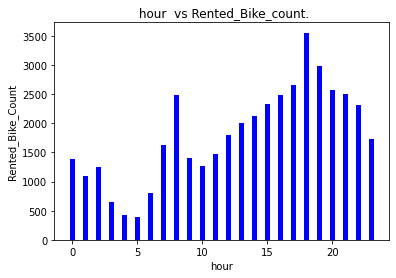

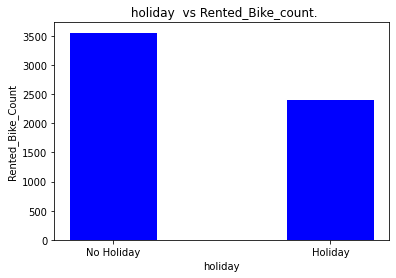

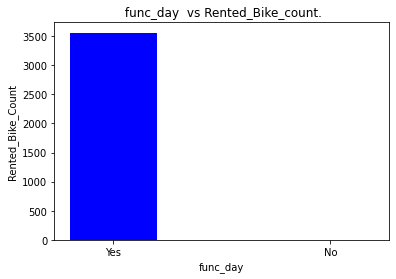

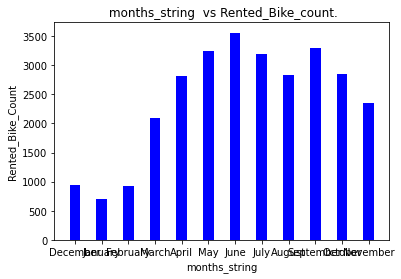

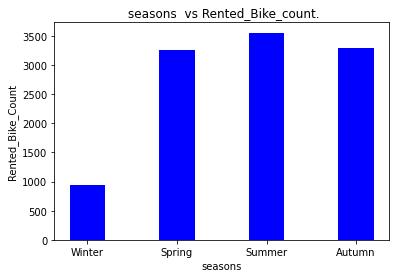

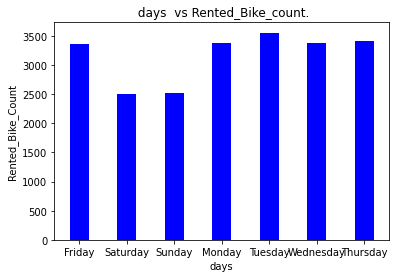

<Figure size 432x288 with 0 Axes>

In [ ]:
# make plot for catogerical variable
for var in c_var:
  plt.bar(Bike_data[var], Bike_data['rented_bike_count'],color ='blue',width = 0.4)
  plt.xlabel(var)
  plt.ylabel("Rented_Bike_Count")
  plt.title(f" {var}  vs Rented_Bike_count.")
  plt.show()
  plt.tight_layout()

some points are observed from above bar plot

1.   We can observe from Winter season is having low count of bike rent and summer season is having high count as compared to other so, we can say that people are like to take the bike on rent in summer season.
2.   totla Bike rented at tuesday is more than other days.
3.   total count of bike rented in No holidays days are greater than total count of bike rented in holideays.
4.   in jan the bike rent count is low while in jun and dec the count is high.



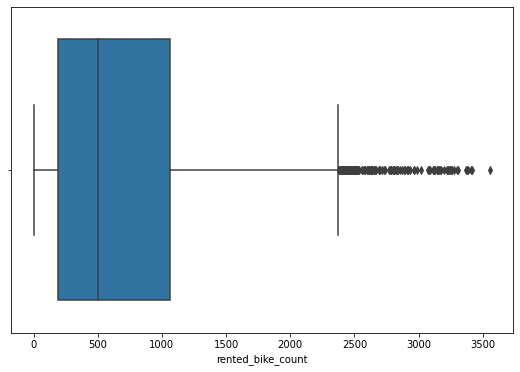

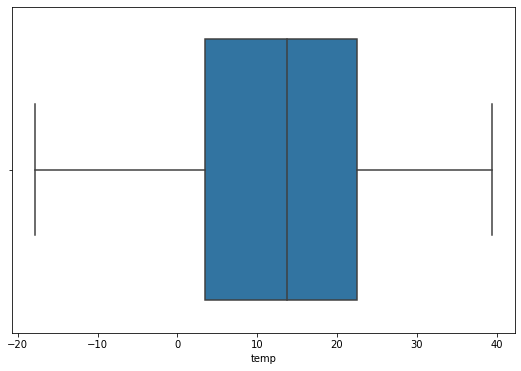

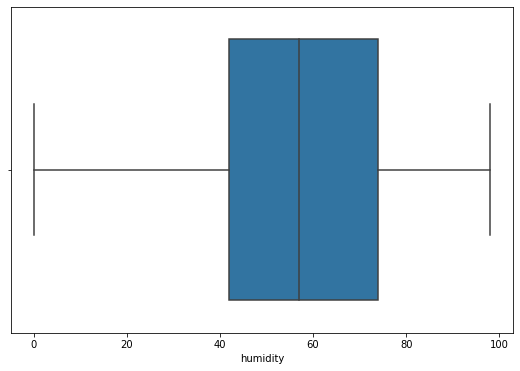

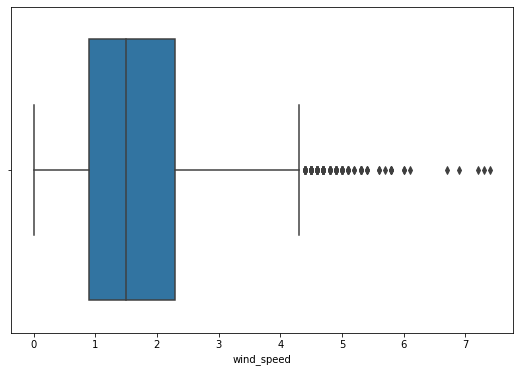

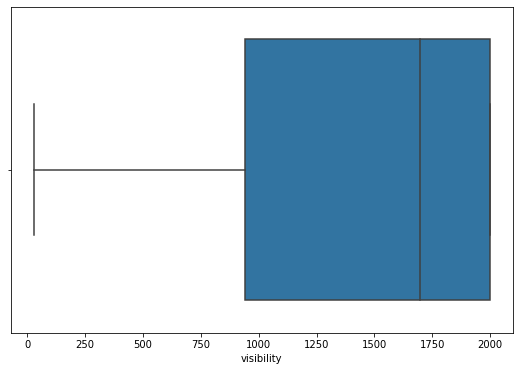

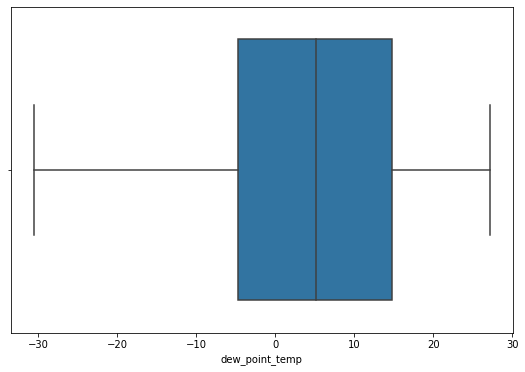

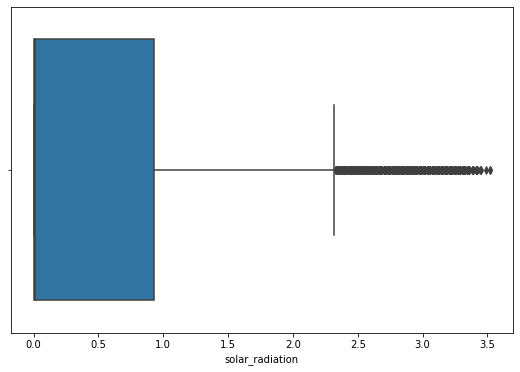

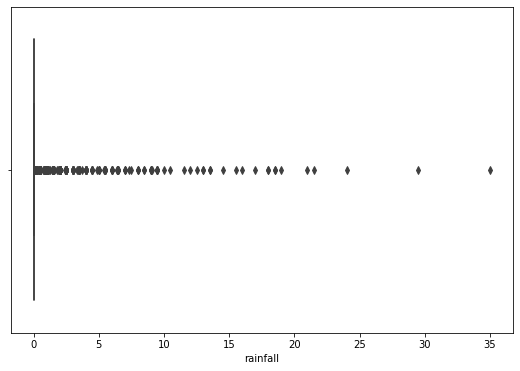

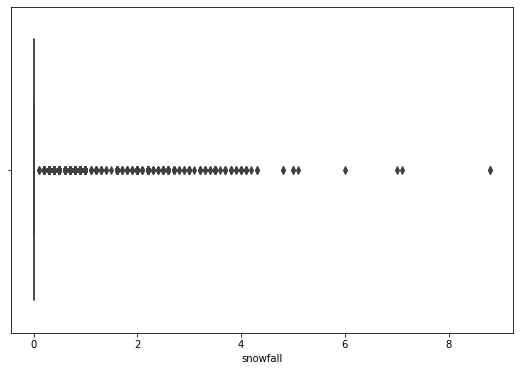

In [ ]:
# lets plot the box plot to check the outliers avilable in numeric data.
for var in n_var:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca() 
    sns.boxplot(x=Bike_data[var])

From above box plot we can see below listed observations.
1.   Snowfall is having some outliers.
2.   Rainfall also having some outliers.
3.   Solar_Radiation also having Some outliers.
4.   wind speed is alos having some outliers.



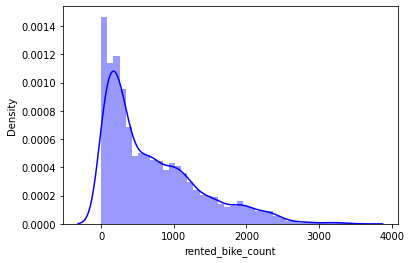

In [ ]:
# lets chcek the distribution of target variables -'Bike_rent_count'.
sns.distplot(Bike_data['rented_bike_count'],kde=True,color='blue')

Target variable is slightly right skewed

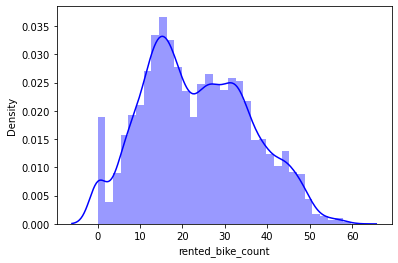

In [ ]:
# to get normal distribution we have to do normalization and we will used squre root method
sns.distplot(np.sqrt(Bike_data['rented_bike_count']),kde=True,color='blue')

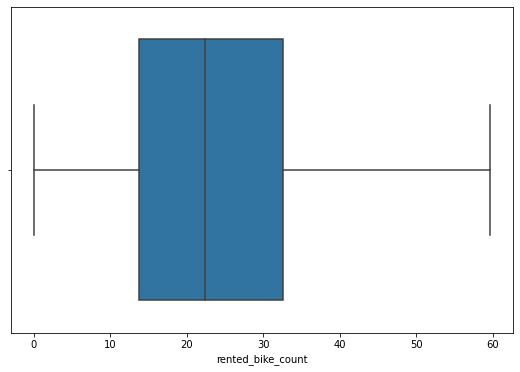

In [ ]:
# also check for outliers by using box plot
plt.figure(figsize=(9, 6))
fig.gca()   
sns.boxplot(x=np.sqrt(Bike_data['rented_bike_count']))

By observing above two graph we can say that now data is normalized, as ther is normal distribution in dist plot and no outliers in box plot.

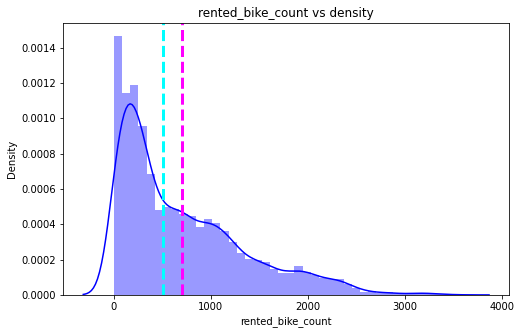

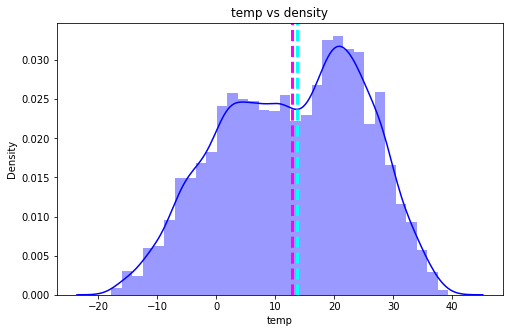

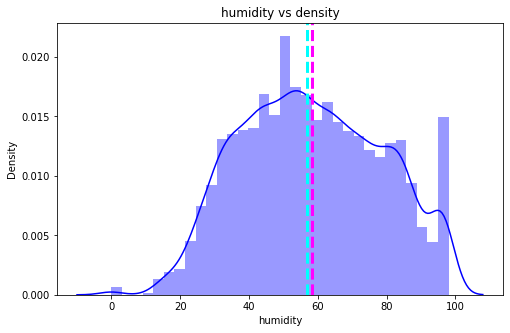

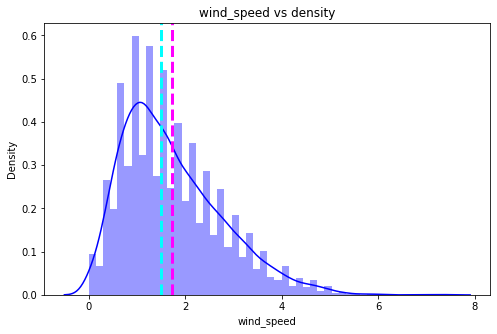

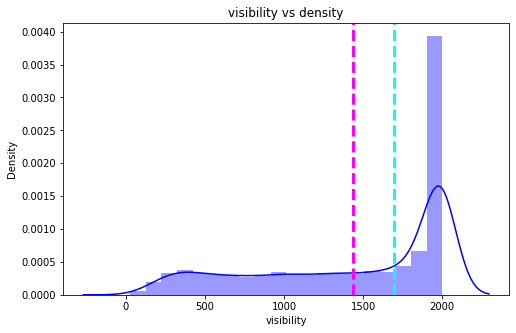

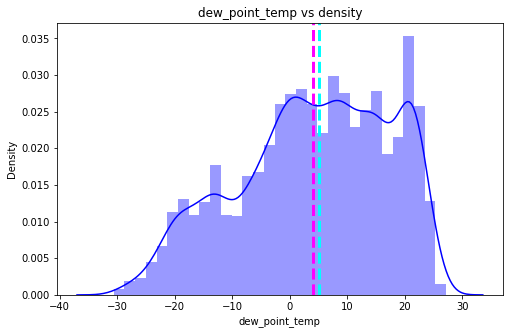

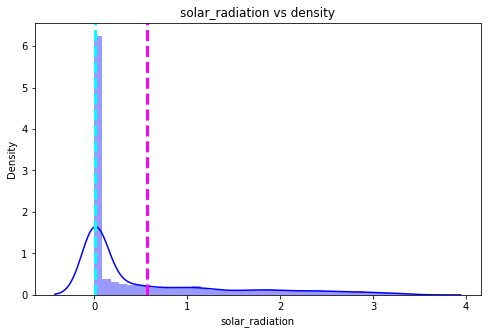

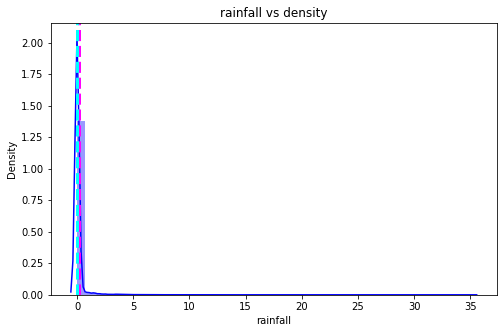

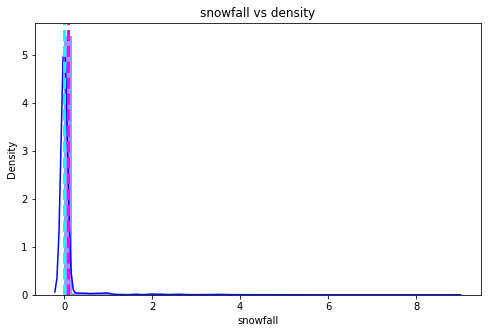

In [ ]:
# lets check the distribution of independent variables.
for col in n_var:
    fig = plt.figure(figsize=(8,5))
    ax = fig.gca()
    sns.distplot(Bike_data[col],kde=True,color='blue')
    ax.axvline(Bike_data[col].mean(), color='magenta', linestyle='dashed', linewidth=3)
    ax.axvline(Bike_data[col].median(), color='cyan', linestyle='dashed', linewidth=3)    
    ax.set_title(f'{col} vs density')
plt.show()

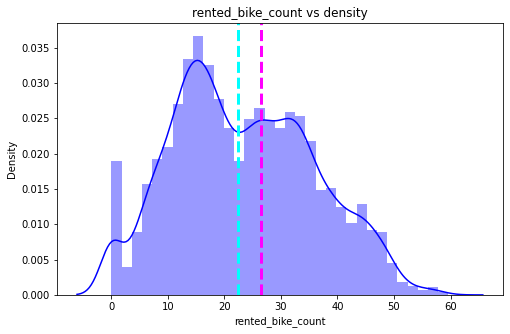

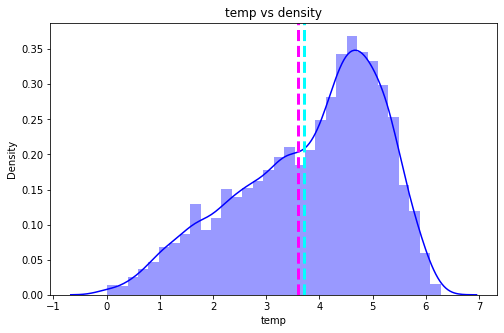

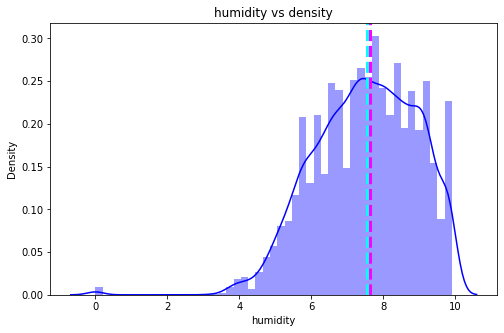

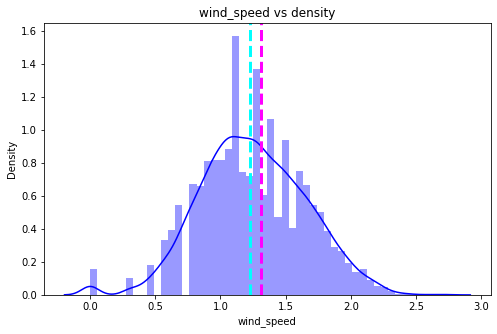

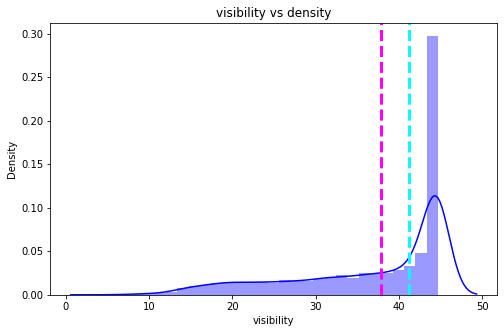

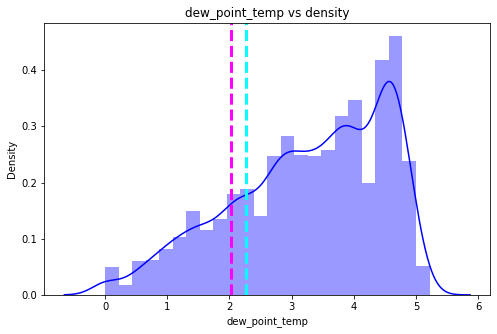

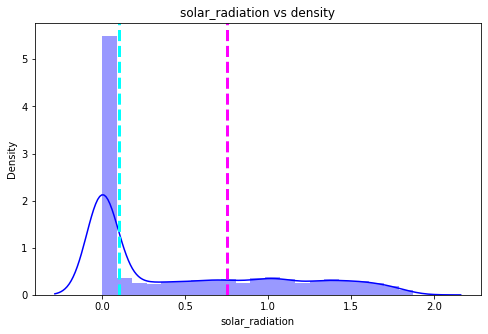

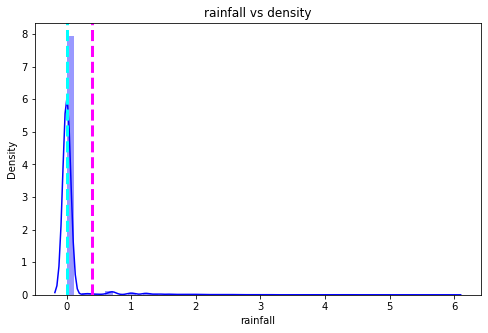

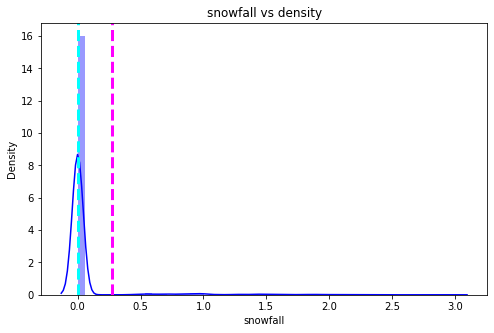

In [ ]:
# normalizing the independent variable by using squre root method
for col in n_var:
    fig = plt.figure(figsize=(8,5))
    ax = fig.gca()
    sns.distplot(np.sqrt(Bike_data[col]),kde=True,color='blue')
    ax.axvline(np.sqrt(Bike_data[col].mean()), color='magenta', linestyle='dashed', linewidth=3)
    ax.axvline(np.sqrt(Bike_data[col].median()), color='cyan', linestyle='dashed', linewidth=3)    
    ax.set_title(f'{col} vs density')
plt.show()

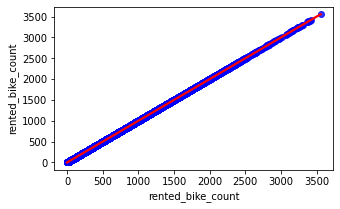

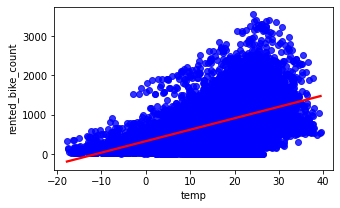

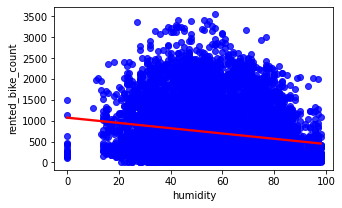

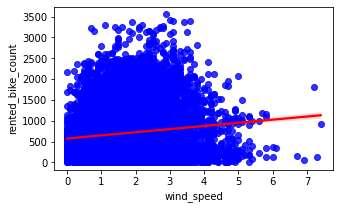

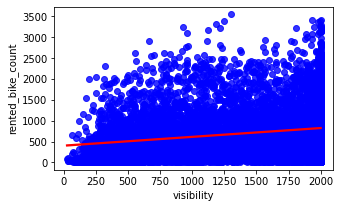

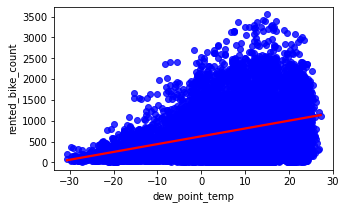

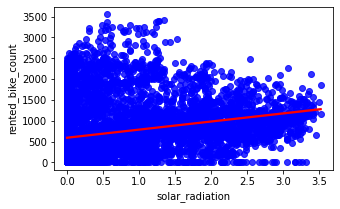

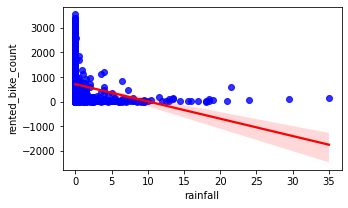

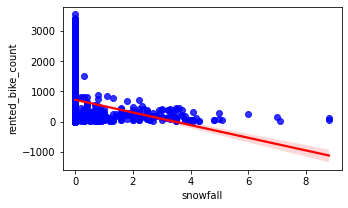

In [ ]:
# lets check the relation between our dependent var and independent variable with numerical variable.
for var in n_var:
  plt.figure(figsize=(5,3))
  ax=fig.gca()
  sns.regplot(x=Bike_data[var],y=Bike_data['rented_bike_count'],scatter_kws={'color':'blue'},line_kws={'color':'red'})
  ax.set_xlabel(var,fontsize=5)
  ax.set_ylabel('Rented_Bike_Count',fontsize=5)
  ax.set_title(f'{var} vs Rented_Bike_Count',fontsize=5)
  plt.show()

Below are the some points that are noticable from above Figures.
1.   We can see from "Hour" and "Rented_Bike_count" corelation there is sudden decrease in cout from 12 am to 5 am because this is night time and so people are not taking  use to travel in that time, also after 5 am its increase upto 8 am in morning as its office time as well as scool time so people are using bike. after that upto 10 am its decrease upto certain level and again increse upto evening as people are returning from office.
2.   From "Temperature" and "Rented__Bike_count" we can see that as temperature tends to "Zero" Bike count decrease and at normal temp people like to use a bike.
3.  "Humidity" Graph shows as Humidity increae bike count decrease.
4. "Wind_speed graph shows as wind spped increase  bike count increase but its ok up to 4m/s to 5m/s after that count reduce drastically.
5.   good "Visibility" gives directly proportional bike count.
6. "Due_point_temperature" increase bike count increase.
7. "Solar radiation" is having positive relation with bike count
8. " rainfall" and "snowfall" is having inverse relation with bike count, bease people dont use to travel in this wether conditions.



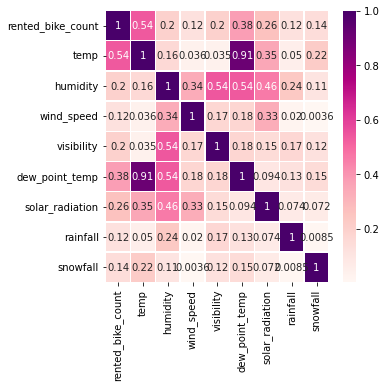

In [ ]:
# lets check the correlation between variables by using heatmap.
plt.figure(figsize=(5,5))
sns.heatmap(data=abs(Bike_data.corr()),annot=True,cmap="RdPu",linewidth=.5)

As we can see that the  temperature and Dew_point_temperature are highly correlated variable so we will drop one of them  in modeling section.


#Modeling

In [ ]:
# creating new feature from temperature and dew point temperature as they both are related to each other.
Bike_data['Temperature_and_dew_temp'] = Bike_data['temp'] + Bike_data['dew_point_temp']

In [ ]:
Bike_data.drop(['temp','dew_point_temp'],axis=1,inplace=True)

In [ ]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
calc_vif(Bike_data[[i for i in Bike_data.describe().columns if i not in ['rented_bike_count']]])

,variables,VIF
0,humidity,4.948927
1,wind_speed,4.172802
2,visibility,4.390699
3,solar_radiation,2.056034
4,rainfall,1.078836
5,snowfall,1.116727
6,Temperature_and_dew_temp,2.166404


Here we can see that all columns are having VIF below 5 so we will keep all varaible.

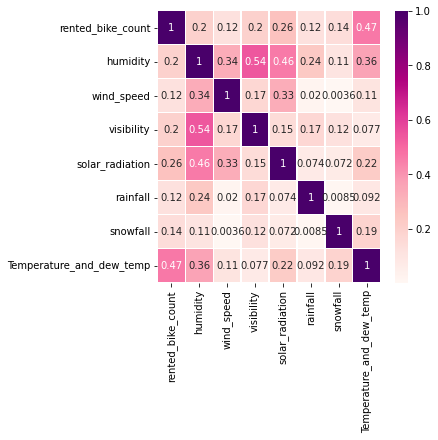

In [ ]:
#lets check the correlation between variables by using heatmap again as
plt.figure(figsize=(5,5))
sns.heatmap(data=abs(Bike_data.corr()),annot=True,cmap="RdPu",linewidth=.5)

In [ ]:
c_var = pd.Index(c_var)

In [ ]:
# # One hot encoding
# #creating a copy of the dataframe
Bike_data = Bike_data.copy()

def one_hot_encoding(data, column):
  data = pd.concat([data, pd.get_dummies(data[column], prefix = column, drop_first = True)], axis =1)
  data = data.drop([column], axis = 1)
  return data

for col in c_var:
  Bike_data = one_hot_encoding(Bike_data, col)

In [ ]:
# lets check the varable list after dumy applied
Bike_data.columns

Index(['rented_bike_count', 'humidity', 'wind_speed', 'visibility',
       'solar_radiation', 'rainfall', 'snowfall', 'Temperature_and_dew_temp',
       'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7',
       'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12', 'hour_13',
       'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18', 'hour_19',
       'hour_20', 'hour_21', 'hour_22', 'hour_23', 'holiday_No Holiday',
       'func_day_Yes', 'months_string_August', 'months_string_December',
       'months_string_February', 'months_string_January', 'months_string_July',
       'months_string_June', 'months_string_March', 'months_string_May',
       'months_string_November', 'months_string_October',
       'months_string_September', 'seasons_Spring', 'seasons_Summer',
       'seasons_Winter', 'days_Monday', 'days_Saturday', 'days_Sunday',
       'days_Thursday', 'days_Tuesday', 'days_Wednesday'],
      dtype='object')

In [ ]:
len(Bike_data.columns)

53

#1.   Linear Regression




In [ ]:
# let's import required library for Linear Regression.
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [ ]:
# let's define X and y variable as independent and dependent variable respectively.
X = Bike_data.drop(columns= ['rented_bike_count'], axis =1)
y = np.sqrt(Bike_data['rented_bike_count'])

In [ ]:
# split data in to train and test split.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
# lets take regressor as liner regression
reg=LinearRegression()
# fitting the model to trainig
reg.fit(X_train,y_train)

LinearRegression()

In [ ]:
# check coefficent of liner regression
imp_v= (reg.coef_)
imp_v

array([-1.98555503e-01, -5.21073372e-02,  1.03840274e-03,  8.81259466e-01,
       -1.44945561e+00,  1.79080315e-02,  2.74648583e-01, -2.25078555e+00,
       -4.99917148e+00, -7.36679144e+00, -9.45796092e+00, -8.96088993e+00,
       -4.03079032e+00,  2.33997403e+00,  7.51647847e+00,  1.07572394e+00,
       -3.33723547e+00, -3.66926663e+00, -2.91510490e+00, -2.89283687e+00,
       -3.16111137e+00, -1.93378038e+00,  2.82067093e-01,  3.70321670e+00,
        1.01366775e+01,  6.66581049e+00,  5.80971931e+00,  6.14658078e+00,
        4.82152847e+00,  1.23106252e+00,  3.51084319e+00,  2.85080457e+01,
       -4.25479337e+00,  5.01361679e-01, -2.19521855e+00, -1.50876747e+00,
       -1.67753849e+00,  4.30875881e+00, -9.22081210e-01,  2.23888176e+00,
        2.60935983e+00,  3.10947085e+00,  2.34923055e-01, -1.12755634e+00,
       -1.62357305e+00, -3.20262434e+00, -1.34639563e+00, -1.13438208e+00,
       -2.72077636e+00, -6.36483317e-01, -4.98490113e-01, -4.03198718e-01])

In [ ]:
#lets Check score
reg.score(X_train,y_train)

0.7774440686356205

In [ ]:
# Y peredictions on train data
y_pred_train=reg.predict(X_train)

# y predictions on test data
y_pred=reg.predict(X_test)

In [ ]:
# Evaluation of training data set

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_train,y_pred_train)
print(f"The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_train,y_pred_train)
print(f"The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_train,y_pred_train)
print(f"The R2 Score is {R2}.")

The Mean Absolute Error (MAE) is 4.421336380329657.
The Mean Squred Error(MSE) is 34.619133338127774.
The Root Mean Squared Error(RMSE) is 5.883802625694354.
The R2 Score is 0.7774440686356205.


In [ ]:
# Evaluation of Test data set

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_test,y_pred)
print(f" The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_test,y_pred)
print(f" The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_test,y_pred)
print(f"The R2 Score is {R2}.")

 The Mean Absolute Error (MAE) is 4.383717440017905.
 The Mean Squred Error(MSE) is 33.02552351178221.
The Root Mean Squared Error(RMSE) is 5.746783753699299.
The R2 Score is 0.7849874017974051.


From above both result having value near about similar  so we can say that model is performing good but as R2 score is low about 78% so there is need of madel improvement.

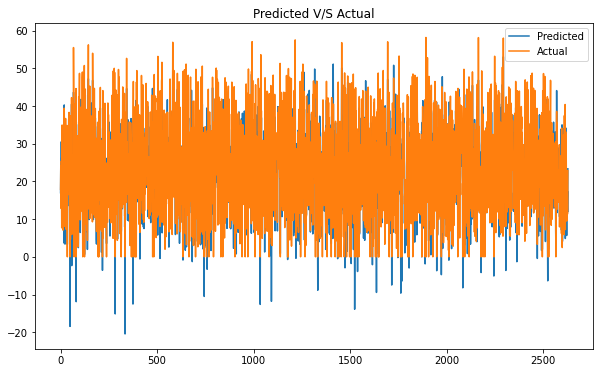

In [ ]:
# plot to check the  predicted y values and actual y values
plt.figure(figsize=(10,6))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"],)
plt.title("Predicted V/S Actual")
plt.show()

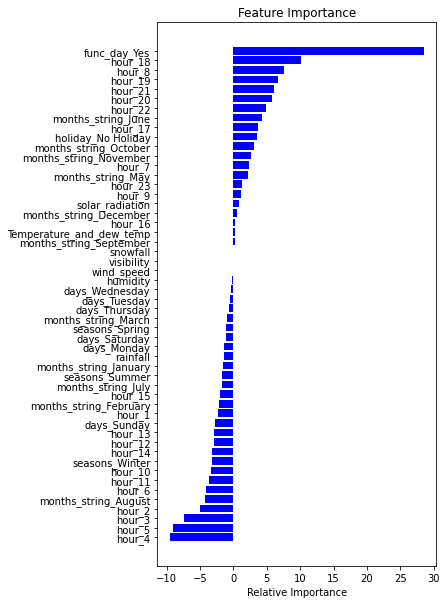

In [ ]:
#def get_features_importance (optimal_model,X_train):
features = X_train.columns
indices = np.argsort(reg.coef_)
plt.figure(figsize=(5,10))
plt.title('Feature Importance')
plt.barh(range(len(indices)), imp_v[indices], color='Blue', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

#2.Ridge Regression

In [ ]:
# fitting and training data with the help of ridge 
redg=Ridge(alpha=1)
redg.fit(X_train,y_train)

Ridge(alpha=1)

In [ ]:
# check the coefficent for ridge.
pd.DataFrame(redg.coef_,X.columns,columns=['Coefficients'])

,Coefficients
humidity,-0.199062
wind_speed,-0.048116
visibility,0.001038
solar_radiation,0.859233
rainfall,-1.448916
snowfall,0.021128
Temperature_and_dew_temp,0.275181
hour_1,-2.220806
hour_2,-4.958492
hour_3,-7.317829


In [ ]:
# let's check the intercept of the ridge
redg.intercept_

0.4215923606420269

In [ ]:
# Y peredictions on train data
y_pred_train=redg.predict(X_train)

# y predictions on test data
y_pred=redg.predict(X_test)

In [ ]:
# Evaluation of training data set

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_train,y_pred_train)
print(f"The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_train,y_pred_train)
print(f"The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_train,y_pred_train)
print(f"The R2 Score is {R2}.")

The Mean Absolute Error (MAE) is 4.422254940776962.
The Mean Squred Error(MSE) is 34.620444354834916.
The Root Mean Squared Error(RMSE) is 5.88391403360339.
The R2 Score is 0.7774356405059663.


In [ ]:
# Evaluation of Test data set

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_test,y_pred)
print(f" The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_test,y_pred)
print(f" The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_test,y_pred)
print(f"The R2 Score is {R2}.")

 The Mean Absolute Error (MAE) is 4.386200958344224.
 The Mean Squred Error(MSE) is 33.04526691462326.
The Root Mean Squared Error(RMSE) is 5.748501275517234.
The R2 Score is 0.7848588624166228.


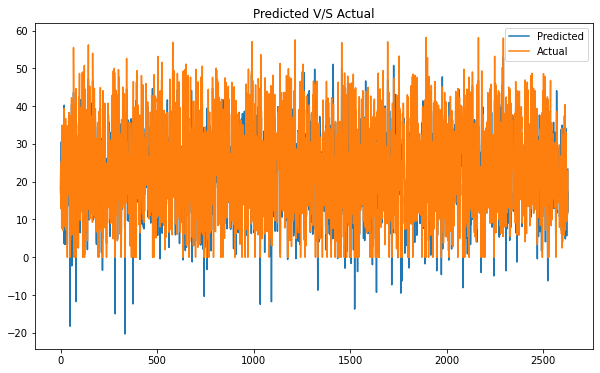

In [ ]:
# plot to check the  predicted y values and actual y values
plt.figure(figsize=(10,6))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"],)
plt.title("Predicted V/S Actual")
plt.show()

In [ ]:
# Hyperprarameter tuning
# import GridSearchCV
from sklearn.model_selection import GridSearchCV
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=4)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1}

Using  {'alpha': 1}  the negative mean squared error is:  -35.42149340011247


As from above result we can say that the best alpha value is 1. 

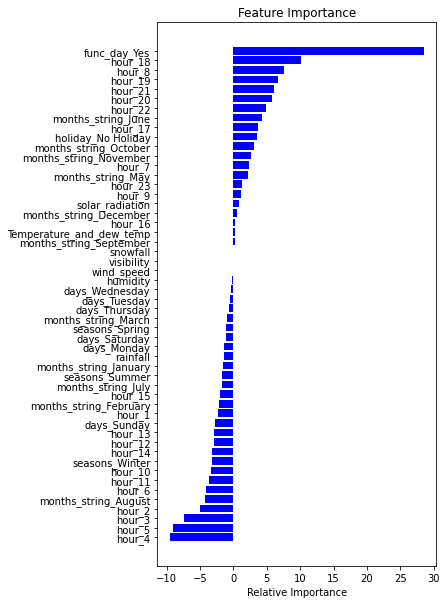

In [ ]:
#def get_features_importance (optimal_model,X_train):
features = X_train.columns
indices = np.argsort(redg.coef_)
plt.figure(figsize=(5,10))
plt.title('Feature Importance')
plt.barh(range(len(indices)), imp_v[indices], color='Blue', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

#3. Lasso regression

In [ ]:
# import lasso regressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

In [ ]:
# fitting and training data with the help of lasso.
lasso=Lasso(alpha = 0.001,max_iter = 3000)
lasso.fit(X_train,y_train)

Lasso(alpha=0.001, max_iter=3000)

In [ ]:
# check the coefficent for lasso.
pd.DataFrame(lasso.coef_,X.columns,columns=['Coefficients'])

,Coefficients
humidity,-0.199116
wind_speed,-0.048213
visibility,0.001042
solar_radiation,0.838188
rainfall,-1.449440
snowfall,0.014706
Temperature_and_dew_temp,0.275528
hour_1,-2.200028
hour_2,-4.948381
hour_3,-7.313338


In [ ]:
# let's check the intercept of the lasso
lasso.intercept_

-0.8313090231206424

In [ ]:
# Y peredictions on train data
y_pred_train=lasso.predict(X_train)

# y predictions on test data
y_pred=lasso.predict(X_test)

In [ ]:
# Evaluation of training data set

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_train,y_pred_train)
print(f"The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_train,y_pred_train)
print(f"The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_train,y_pred_train)
print(f"The R2 Score is {R2}.")

The Mean Absolute Error (MAE) is 4.4211620002773975.
The Mean Squred Error(MSE) is 34.62055416044538.
The Root Mean Squared Error(RMSE) is 5.8839233645965665.
The R2 Score is 0.7774349345989273.


In [ ]:
# Evaluation of Test data set

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_test,y_pred)
print(f" The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_test,y_pred)
print(f" The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_test,y_pred)
print(f"The R2 Score is {R2}.")

 The Mean Absolute Error (MAE) is 4.383823398178373.
 The Mean Squred Error(MSE) is 33.028874244623516.
The Root Mean Squared Error(RMSE) is 5.747075277445347.
The R2 Score is 0.7849655868586098.


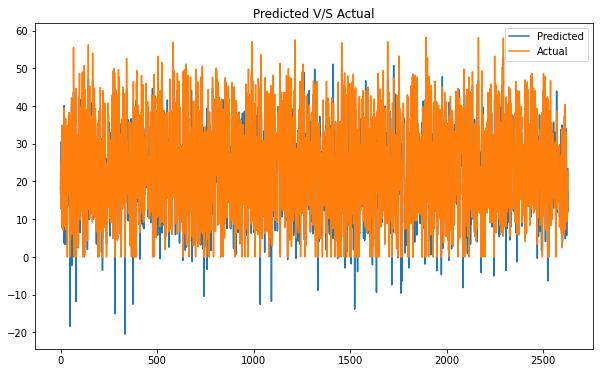

In [ ]:
# plot to check the  predicted y values and actual y values
plt.figure(figsize=(10,6))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"],)
plt.title("Predicted V/S Actual")
plt.show()

In [ ]:
# Hyperprarameter tuning
# import GridSearchCV
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=4)
lasso_regressor.fit(X_train,y_train)

GridSearchCV(cv=4, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)

The best fit alpha value is found out to be : {'alpha': 0.001}


Thus for lasso regression alpha value is 0.001 is the best value.

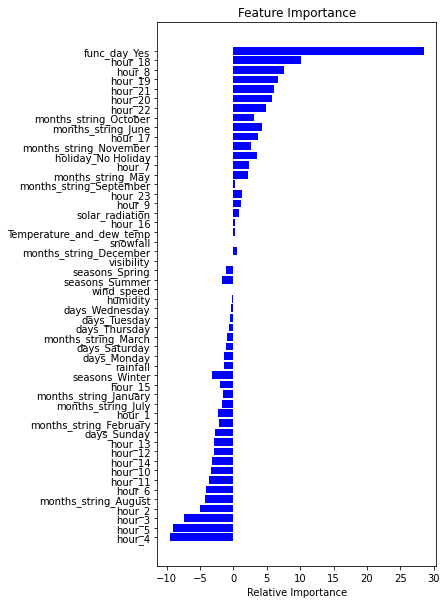

In [ ]:
#def get_features_importance (optimal_model,X_train):
features = X_train.columns
indices = np.argsort(lasso.coef_)
plt.figure(figsize=(5,10))
plt.title('Feature Importance')
plt.barh(range(len(indices)), imp_v[indices], color='Blue', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

#4. Decission Tree regresion

In [ ]:
#import decsion tree  from sklearn
from sklearn.tree import DecisionTreeRegressor

In [ ]:
DT=DecisionTreeRegressor(criterion='mse', max_depth=20,
                      max_features=10, max_leaf_nodes=100, random_state=0)
#fit Xtrain yTrain
DT.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=20, max_features=10,
                      max_leaf_nodes=100, random_state=0)

In [ ]:
# Y peredictions on train data
y_pred_train=DT.predict(X_train)

# y predictions on test data
y_pred=DT.predict(X_test)

In [ ]:
# Evaluation of training data set

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_train,y_pred_train)
print(f"The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_train,y_pred_train)
print(f"The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_train,y_pred_train)
print(f"The R2 Score is {R2}.")

The Mean Absolute Error (MAE) is 3.8888845205025357.
The Mean Squred Error(MSE) is 28.079942646621333.
The Root Mean Squared Error(RMSE) is 5.299051108134487.
The R2 Score is 0.8194825466212801.


In [ ]:
# Evaluation of Test data set

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_test,y_pred)
print(f" The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_test,y_pred)
print(f" The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_test,y_pred)
print(f"The R2 Score is {R2}.")

 The Mean Absolute Error (MAE) is 4.096257963572379.
 The Mean Squred Error(MSE) is 32.80942036512197.
The Root Mean Squared Error(RMSE) is 5.727950799816805.
The R2 Score is 0.7863943408585407.


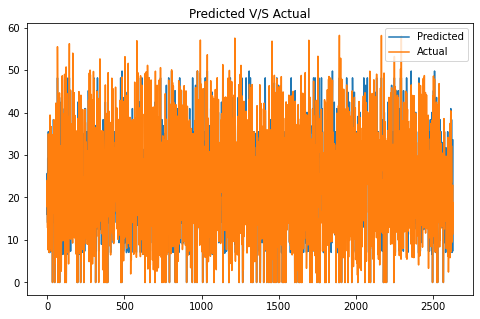

In [ ]:
# plot to check the  predicted y values and actual y values
plt.figure(figsize=(8,5))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"],)
plt.title("Predicted V/S Actual")
plt.show()

In [ ]:
# Hyper parameters tuning 
tree=DecisionTreeRegressor()
parameters={'criterion': ["mae"],
            "splitter":["best","random"],
            "max_depth" : [3,5,7,9,10,15,20,None],
           "max_features":["auto","log2"] }

In [ ]:
DTM=GridSearchCV(tree,param_grid=parameters,scoring='neg_mean_squared_error',cv=3,verbose=0)
DTM.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mae'],
                         'max_depth': [3, 5, 7, 9, 10, 15, 20, None],
                         'max_features': ['auto', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [ ]:
# lets check the best parameter
DTM.best_params_

{'criterion': 'mae',
 'max_depth': 20,
 'max_features': 'auto',
 'splitter': 'best'}

In [ ]:
imp_v = DT.feature_importances_
pd.DataFrame(imp_v,X.columns,columns=['Value'])

,Value
humidity,0.103113
wind_speed,0.007839
visibility,0.003271
solar_radiation,0.032477
rainfall,0.090087
snowfall,0.000000
Temperature_and_dew_temp,0.292054
hour_1,0.000000
hour_2,0.000903
hour_3,0.029032


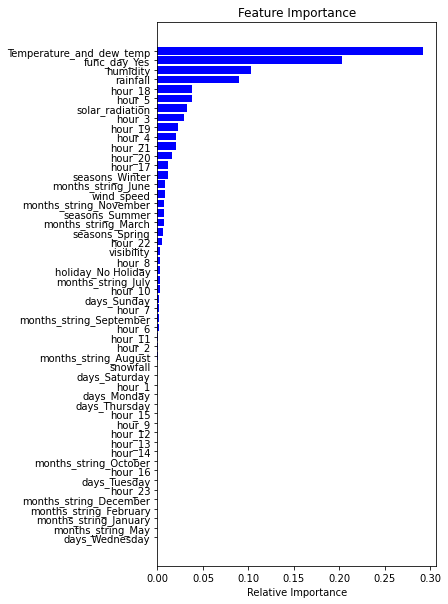

In [ ]:
#def get_features_importance (optimal_model,X_train):
features = X_train.columns
indices = np.argsort(imp_v)
plt.figure(figsize=(5,10))
plt.title('Feature Importance')
plt.barh(range(len(indices)), imp_v[indices], color='Blue', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

#5. Random Forest

In [ ]:
#import the packages
from sklearn.ensemble import RandomForestRegressor
# Create an instance of the RandomForestRegressor
rf_model = RandomForestRegressor()
# Fitting the model
rf_model.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
# Y peredictions on train data
y_pred_train=rf_model.predict(X_train)

# y predictions on test data
y_pred=rf_model.predict(X_test)

In [ ]:
# Evaluation of Test data set
#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_train,y_pred_train)
print(f"The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_train,y_pred_train)
print(f"The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_train,y_pred_train)
print(f"The R2 Score is {R2}.")

The Mean Absolute Error (MAE) is 0.8327773540400398.
The Mean Squred Error(MSE) is 1.7588849736476249.
The Root Mean Squared Error(RMSE) is 1.3262296081929497.
The R2 Score is 0.9886926607997482.


In [ ]:
# Evaluation of Test data set

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_test,y_pred)
print(f" The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_test,y_pred)
print(f" The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_test,y_pred)
print(f"The R2 Score is {R2}.")

 The Mean Absolute Error (MAE) is 2.2834491592348978.
 The Mean Squred Error(MSE) is 13.14070007058854.
The Root Mean Squared Error(RMSE) is 3.625010354549148.
The R2 Score is 0.9144475010859323.


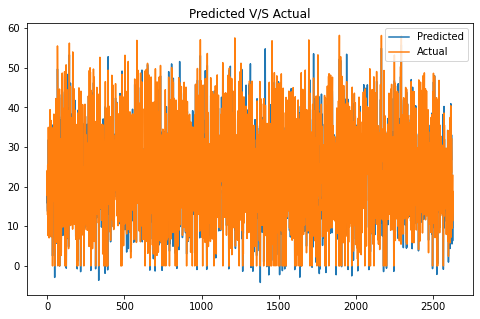

In [ ]:
# plot to check the  predicted y values and actual y values
plt.figure(figsize=(8,5))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"],)
plt.title("Predicted V/S Actual")
plt.show()

In [ ]:
imp_v = rf_model.feature_importances_
pd.DataFrame(imp_v,X.columns,columns=['Value'])

,Value
humidity,0.168407
wind_speed,0.010577
visibility,0.011411
solar_radiation,0.085874
rainfall,0.027248
snowfall,0.001657
Temperature_and_dew_temp,0.080547
hour_1,0.003469
hour_2,0.007116
hour_3,0.012175


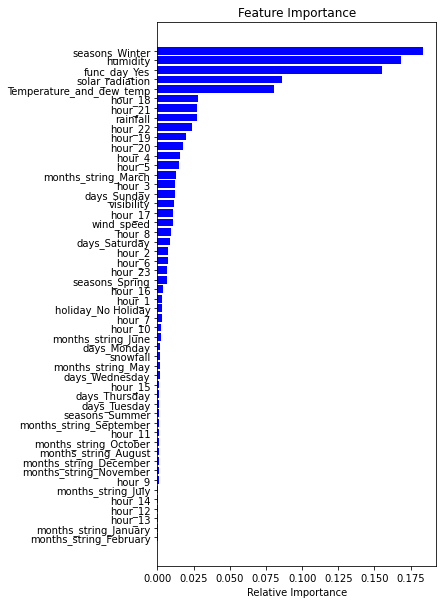

In [ ]:
plt.figure(figsize=(5,10))
features = X_train.columns
indices = np.argsort(imp_v)
plt.title('Feature Importance')
plt.barh(range(len(indices)), imp_v[indices], color='Blue', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# 6. Gradient Boosting Regressor

In [ ]:
#importing the library
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
gb_model = GradientBoostingRegressor(max_depth=8, min_samples_leaf=40,
                          min_samples_split=50)

In [ ]:
# Fitting the model
gb_model.fit(X_train,y_train)

GradientBoostingRegressor(max_depth=8, min_samples_leaf=40,
                          min_samples_split=50)

In [ ]:
# Y peredictions on train data
y_pred_train=gb_model.predict(X_train)

# y predictions on test data
y_pred=gb_model.predict(X_test)

In [ ]:
# Evaluation of Train data set
#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_train,y_pred_train)
print(f"The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_train,y_pred_train)
print(f"The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_train,y_pred_train)
print(f"The R2 Score is {R2}.")

The Mean Absolute Error (MAE) is 1.9816804036221263.
The Mean Squred Error(MSE) is 8.211778481052749.
The Root Mean Squared Error(RMSE) is 2.865620086657118.
The R2 Score is 0.9472089612943644.


In [ ]:
# Evaluation of Test data set

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_test,y_pred)
print(f" The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_test,y_pred)
print(f" The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_test,y_pred)
print(f"The R2 Score is {R2}.")

 The Mean Absolute Error (MAE) is 2.560142670955475.
 The Mean Squred Error(MSE) is 13.796338035872681.
The Root Mean Squared Error(RMSE) is 3.714342207696092.
The R2 Score is 0.9101789715546529.


In [ ]:
imp_v = gb_model.feature_importances_
pd.DataFrame(imp_v,X.columns,columns=['Value'])

,Value
humidity,0.182542
wind_speed,0.007353
visibility,0.007182
solar_radiation,0.069796
rainfall,0.036332
snowfall,0.001304
Temperature_and_dew_temp,0.149065
hour_1,0.000763
hour_2,0.007889
hour_3,0.016121


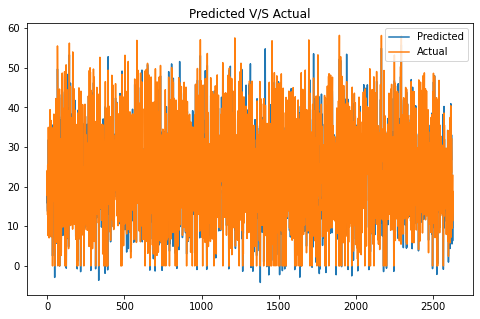

In [ ]:
# plot to check the  predicted y values and actual y values
plt.figure(figsize=(8,5))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"],)
plt.title("Predicted V/S Actual")
plt.show()

In [ ]:
# hyper parameter tuning
# Grid search
# Hyperparameter Grid
param_dict = {'n_estimators' : [50,80,100],
              'max_depth' : [4,6,8],
              'min_samples_split' : [50,100,150],
              'min_samples_leaf' : [40,50]}
gb_grid = GridSearchCV(estimator=gb_model,
                       param_grid = param_dict,
                       cv = 5, verbose=2)

gb_grid.fit(X_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.6s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.6s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.6s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.6s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.6s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.9s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.9s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.9s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.9s
[CV] END max_depth=4, min_sam

GridSearchCV(cv=5,
             estimator=GradientBoostingRegressor(max_depth=8,
                                                 min_samples_leaf=40,
                                                 min_samples_split=50),
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [50, 80, 100]},
             verbose=2)

In [ ]:
gb_grid.best_estimator_

GradientBoostingRegressor(max_depth=8, min_samples_leaf=40,
                          min_samples_split=100)

In [ ]:
gb_optimal_model = gb_grid.best_estimator_

In [ ]:
gb_grid.best_params_

{'max_depth': 8,
 'min_samples_leaf': 40,
 'min_samples_split': 100,
 'n_estimators': 100}

In [ ]:
imp_v = gb_model.feature_importances_
pd.DataFrame(imp_v,X.columns,columns=['Value'])

,Value
humidity,0.182542
wind_speed,0.007353
visibility,0.007182
solar_radiation,0.069796
rainfall,0.036332
snowfall,0.001304
Temperature_and_dew_temp,0.149065
hour_1,0.000763
hour_2,0.007889
hour_3,0.016121


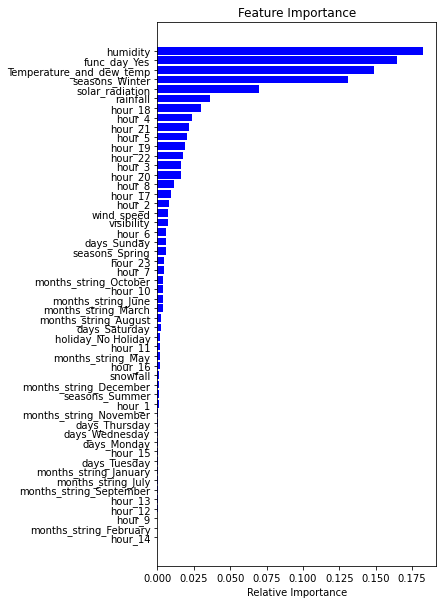

In [ ]:
features = X_train.columns
indices = np.argsort(imp_v)
plt.figure(figsize=(5,10))
plt.title('Feature Importance')
plt.barh(range(len(indices)), imp_v[indices], color='Blue', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

# Conclusion

In conclusion, we can say that we implemented various models like Linear Regression, Lasso Regression, Ridge Regression,Decision Tree, Random Forest, Gradient Boosting on the dataset. . Out of all the built model, random forest and gradient boosting hypertuned via GridSearchCV model performed really well for this dataset with r2 score of 98.85% and 91.3% for random forest train and test dataset, for gradient boosting we achieved r2 score of 94.72%, 91.01% respectively. Although, Linear, lasso ,ridge and Decision Tree has comparatively less r2_score of round 74% for all There were many outliers in the dependent variable which were fixed using square root transformation. The most important features which effect the rented bike count is temperature and dew point temperature. 